## Deep Learning

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from show_metrics import show_metrics_DL
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)
from feature_selection import forward_select, backward_select, rf_select

### Splitting data

In [16]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


In [17]:
def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



def train_ann(X_train, y_train, X_test, y_test, sampling_technique):

    model = KerasClassifier(model=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics



Epoch 1/30
386/386 [==============================] - 2s 3ms/step - loss: 0.3423 - accuracy: 0.8629
Epoch 2/30
386/386 [==============================] - 1s 4ms/step - loss: 0.2171 - accuracy: 0.9413
Epoch 3/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2070 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2001 - accuracy: 0.9413
Epoch 5/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1968 - accuracy: 0.9413
Epoch 6/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1943 - accuracy: 0.9413
Epoch 7/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1929 - accuracy: 0.9412
Epoch 8/30
386/386 [==============================] - 1s 4ms/step - loss: 0.1913 - accuracy: 0.9412
Epoch 9/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1905 - accuracy: 0.9412
Epoch 10/30
386/386 [==============================] - 2s 4ms/step - loss: 0.1897 - accuracy: 0.9412

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

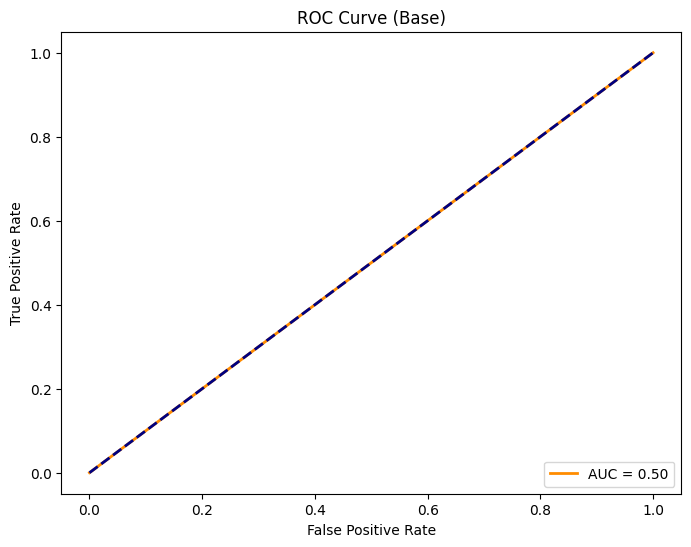

Epoch 1/30
726/726 [==============================] - 3s 3ms/step - loss: 0.5886 - accuracy: 0.6989
Epoch 2/30
726/726 [==============================] - 2s 3ms/step - loss: 0.5111 - accuracy: 0.7586
Epoch 3/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4911 - accuracy: 0.7638
Epoch 4/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4780 - accuracy: 0.7688
Epoch 5/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4646 - accuracy: 0.7777
Epoch 6/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4530 - accuracy: 0.7846
Epoch 7/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4440 - accuracy: 0.7898
Epoch 8/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4350 - accuracy: 0.7941
Epoch 9/30
726/726 [==============================] - 3s 3ms/step - loss: 0.4275 - accuracy: 0.7982
Epoch 10/30
726/726 [==============================] - 3s 4ms/step - loss: 0.4222 - accuracy: 0.8029

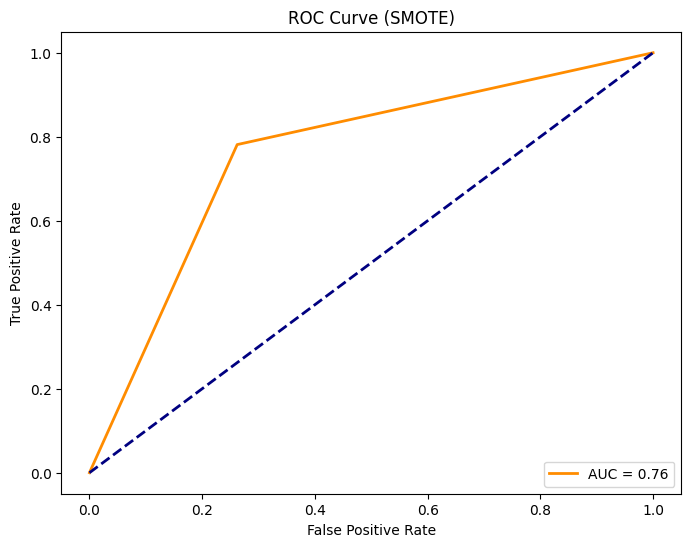

Epoch 1/30
726/726 [==============================] - 3s 3ms/step - loss: 0.5779 - accuracy: 0.7047
Epoch 2/30
726/726 [==============================] - 2s 3ms/step - loss: 0.5150 - accuracy: 0.7497
Epoch 3/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4985 - accuracy: 0.7573
Epoch 4/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4826 - accuracy: 0.7669
Epoch 5/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4702 - accuracy: 0.7719
Epoch 6/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4590 - accuracy: 0.7787
Epoch 7/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4499 - accuracy: 0.7824
Epoch 8/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4423 - accuracy: 0.7883
Epoch 9/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4362 - accuracy: 0.7919
Epoch 10/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4305 - accuracy: 0.7973

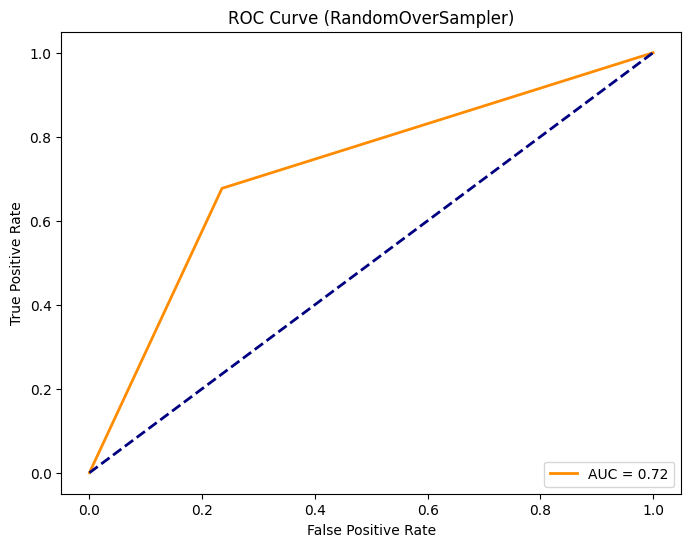

Epoch 1/30
46/46 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.5145
Epoch 2/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6285
Epoch 3/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.6920
Epoch 4/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.7155
Epoch 5/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.7403
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.7465
Epoch 7/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7396
Epoch 8/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5437 - accuracy: 0.7459
Epoch 9/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.7569
Epoch 10/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7666
Epoch 11/30
46/46 [

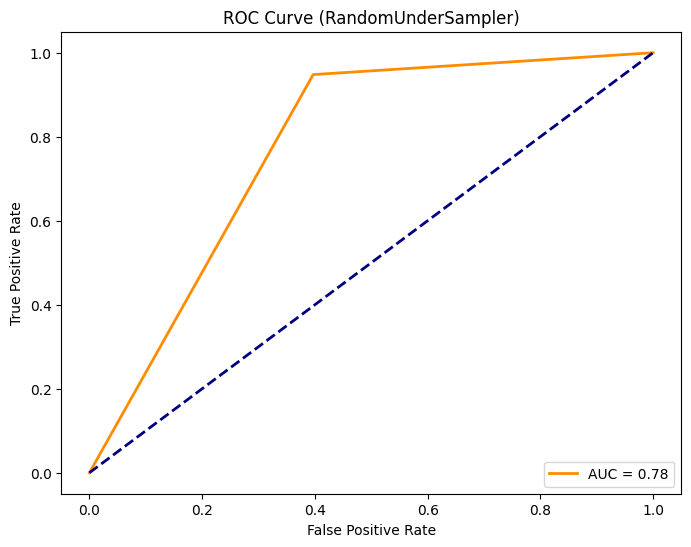

In [18]:
results={}

#No Sampling
metrics = train_ann(X_train, y_train, X_val,y_val,'Base')
results[metrics[0]] = metrics[1:]

#smote
X_smote, y_smote = smote(X_train, y_train)

metrics = train_ann(X_smote, y_smote, X_val,y_val,'SMOTE')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train, y_train)

metrics = train_ann(X_over, y_over, X_val,y_val,'RandomOverSampler')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train, y_train)

metrics = train_ann(X_under, y_under, X_val,y_val,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]



32 features selected: Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make_Honda', 'Make_Toyota',
       'Make_Mazda', 'Make_Chevrolet', 'Make_Pontiac', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus_Single', 'MaritalStatus_Married', 'Age', 'Fault',
       'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy_Liability', 'BasePolicy_Collision', 'BasePolicy_All Perils',
       'Weekend'],
      dtype='object')
(12335, 32)
(12335,)


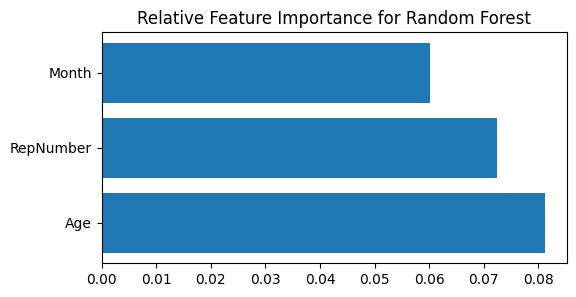

In [19]:
features = rf_select(X_train, y_train)
X_train_rf = X_train[features]
X_val_rf = X_val[features]
X_test_rf = X_test[features]
print(X_train_rf.shape)
print(y_train.shape)


In [20]:
def ann_rf(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(X_train_rf.shape[1],)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_ann_rf(X_train, y_train, X_test, y_test, sampling_technique):

    model = KerasClassifier(model=ann_rf, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

Epoch 1/30
386/386 [==============================] - 2s 3ms/step - loss: 0.3010 - accuracy: 0.8927
Epoch 2/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2161 - accuracy: 0.9413
Epoch 3/30
386/386 [==============================] - 1s 2ms/step - loss: 0.2067 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 1s 2ms/step - loss: 0.2004 - accuracy: 0.9413
Epoch 5/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1961 - accuracy: 0.9413
Epoch 6/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1940 - accuracy: 0.9413
Epoch 7/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1923 - accuracy: 0.9413
Epoch 8/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1909 - accuracy: 0.9412
Epoch 9/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1906 - accuracy: 0.9413
Epoch 10/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1899 - accuracy: 0.9413

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

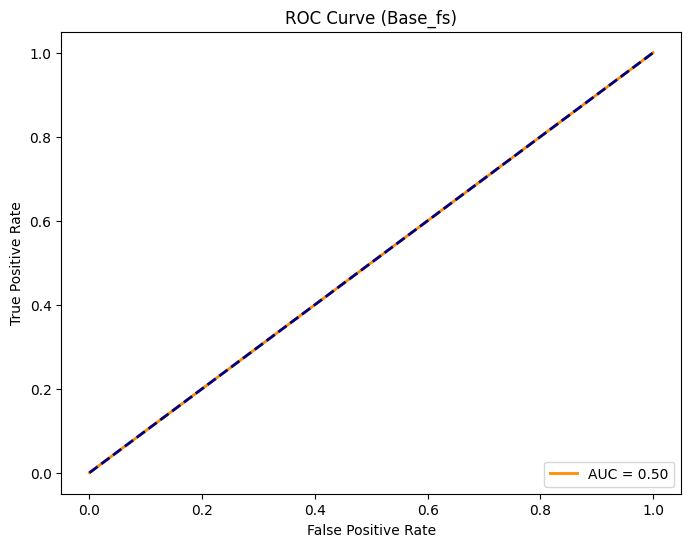

Epoch 1/30
726/726 [==============================] - 3s 3ms/step - loss: 0.5713 - accuracy: 0.7127
Epoch 2/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4923 - accuracy: 0.7635
Epoch 3/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4684 - accuracy: 0.7727
Epoch 4/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4520 - accuracy: 0.7817
Epoch 5/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4383 - accuracy: 0.7924
Epoch 6/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4269 - accuracy: 0.7996
Epoch 7/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4173 - accuracy: 0.8041
Epoch 8/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4108 - accuracy: 0.8081
Epoch 9/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4043 - accuracy: 0.8112
Epoch 10/30
726/726 [==============================] - 2s 2ms/step - loss: 0.3995 - accuracy: 0.8168

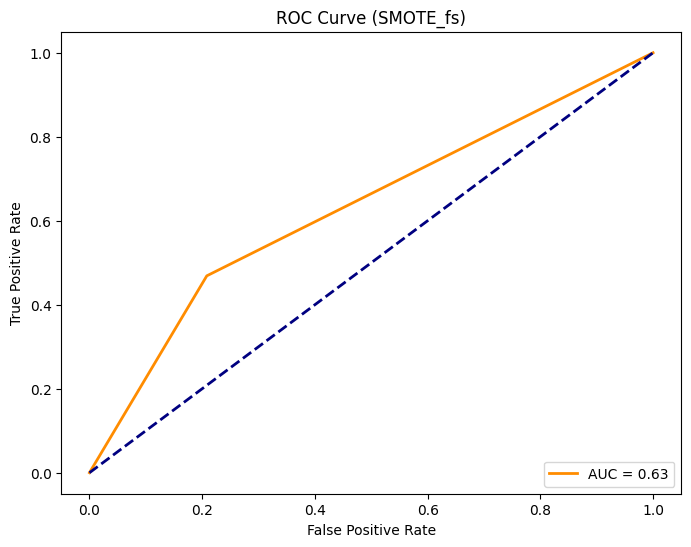

Epoch 1/30
726/726 [==============================] - 3s 2ms/step - loss: 0.6021 - accuracy: 0.6712
Epoch 2/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5223 - accuracy: 0.7448
Epoch 3/30
726/726 [==============================] - 2s 3ms/step - loss: 0.5120 - accuracy: 0.7498
Epoch 4/30
726/726 [==============================] - 2s 3ms/step - loss: 0.5017 - accuracy: 0.7526
Epoch 5/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4927 - accuracy: 0.7566
Epoch 6/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4844 - accuracy: 0.7618
Epoch 7/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4767 - accuracy: 0.7699
Epoch 8/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4704 - accuracy: 0.7735
Epoch 9/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4646 - accuracy: 0.7782
Epoch 10/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4599 - accuracy: 0.7777

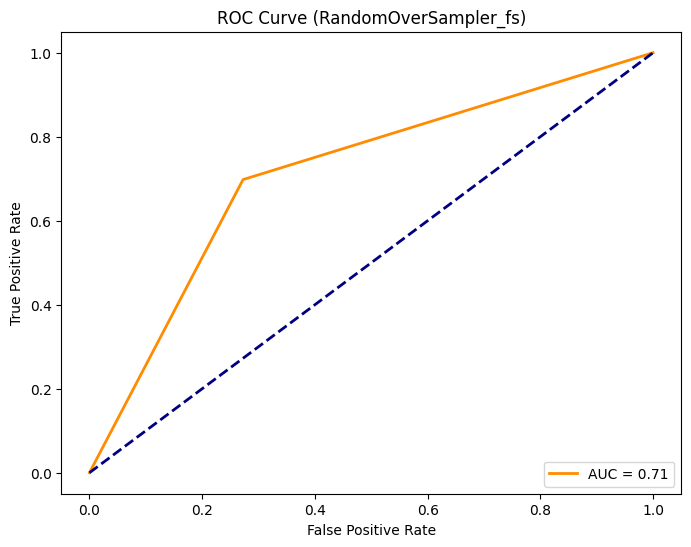

Epoch 1/30
46/46 [==============================] - 1s 2ms/step - loss: 0.6732 - accuracy: 0.5988
Epoch 2/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.6789
Epoch 3/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6138 - accuracy: 0.7155
Epoch 4/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.7244
Epoch 5/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5749 - accuracy: 0.7438
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5619 - accuracy: 0.7445
Epoch 7/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7500
Epoch 8/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7452
Epoch 9/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7604
Epoch 10/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7624
Epoch 11/30
46/46 [

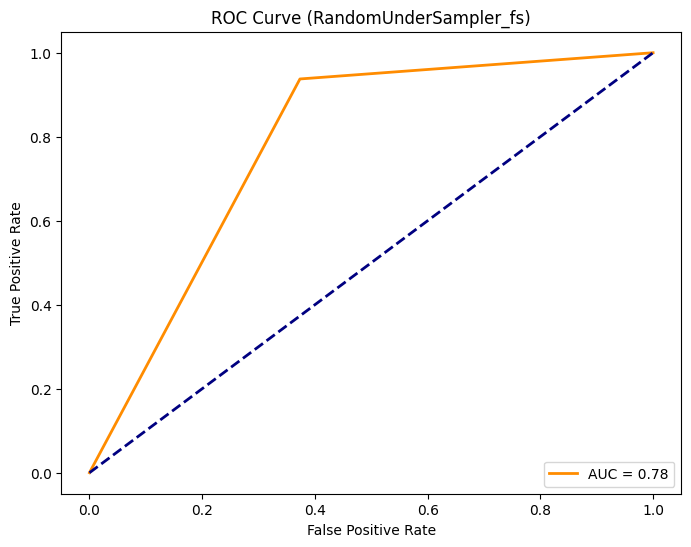

In [21]:
# results={}
#base
metrics = train_ann_rf(X_train_rf, y_train, X_val_rf,y_val,'Base_fs')
results[metrics[0]] = metrics[1:]

#smote
X_smote_rf, y_smote_rf = smote(X_train_rf, y_train)

metrics = train_ann_rf(X_smote_rf, y_smote_rf, X_val_rf,y_val,'SMOTE_fs')
results[metrics[0]] = metrics[1:]

#oversampling
X_over_rf, y_over_rf = oversample(X_train_rf, y_train)

metrics = train_ann_rf(X_over_rf, y_over_rf, X_val_rf,y_val,'RandomOverSampler_fs')
results[metrics[0]] = metrics[1:]

#undersampling
X_under_rf, y_under_rf = undersample(X_train_rf, y_train)

metrics = train_ann_rf(X_under_rf, y_under_rf, X_val_rf,y_val,'RandomUnderSampler_fs')
results[metrics[0]] = metrics[1:]



In [22]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision',  'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,0.948,0.137,0.239,0.625
RandomUnderSampler_fs,0.938,0.143,0.248,0.646
SMOTE,0.781,0.165,0.273,0.741
RandomOverSampler_fs,0.698,0.145,0.241,0.726
RandomOverSampler,0.677,0.160,0.259,0.759
SMOTE_fs,0.469,0.130,0.204,0.772
Base,0.000,0.000,0.000,0.938
Base_fs,0.000,0.000,0.000,0.938


### Hyper-Parameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

model = KerasClassifier(model=ann, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30],  # Number of training epochs
    'dropout_rate': [0.0, 0.1, 0.2],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3)
grid_result = grid.fit(X_under, y_under)
best_hyper = grid_result.best_params_
print("Without Feature Selection, Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Without Feature Selection, Best: 0.893642 using {'activation': 'sigmoid', 'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 30, 'hidden_units': 8, 'learning_rate': 0.01, 'optimizer': 'adam'}


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score


model_fs = KerasClassifier(model=ann_rf, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid_fs = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30],  # Number of training epochs
    'dropout_rate': [0.0, 0.1, 0.2],
}

grid_fs = GridSearchCV(estimator=model_fs, param_grid=param_grid_fs, scoring=make_scorer(recall_score), cv=3)
grid_result_fs = grid_fs.fit(X_under_rf, y_under_rf)
best_hyper_fs = grid_result_fs.best_params_
print("With feature Selection, Best: %f using %s" % (grid_result_fs.best_score_, grid_result_fs.best_params_))


With feature Selection, Best: 0.892259 using {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 30, 'hidden_units': 32, 'learning_rate': 0.001, 'optimizer': 'adam'}


```Function to apply ANN Tuned model on test data (No Feature Selection)```

In [25]:

def train_ann_tuned(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):


    model = KerasClassifier(model=ann, **best_hyper)
    
    model.fit(X_train, y_train, class_weight=class_weights)
   
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

```Function to apply ANN Tuned model on test data (With Feature Selection)```

In [26]:
def train_ann_tuned_fs(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

   
    model = KerasClassifier(model=ann_rf, **best_hyper_fs)
    
    
    model.fit(X_train, y_train, class_weight=class_weights)
   
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

#### Apply tuned model to training sets 

Epoch 1/30


46/46 [==============================] - 1s 3ms/step - loss: 0.7164 - accuracy: 0.5007
Epoch 2/30
46/46 [==============================] - 0s 5ms/step - loss: 0.6843 - accuracy: 0.5615
Epoch 3/30
46/46 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 0.6174
Epoch 4/30
46/46 [==============================] - 0s 4ms/step - loss: 0.6665 - accuracy: 0.6395
Epoch 5/30
46/46 [==============================] - 0s 5ms/step - loss: 0.6587 - accuracy: 0.6575
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6504 - accuracy: 0.6664
Epoch 7/30
46/46 [==============================] - 0s 5ms/step - loss: 0.6427 - accuracy: 0.6699
Epoch 8/30
46/46 [==============================] - 0s 4ms/step - loss: 0.6344 - accuracy: 0.6747
Epoch 9/30
46/46 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.6872
Epoch 10/30
46/46 [==============================] - 0s 5ms/step - loss: 0.6192 - accuracy: 0.6851
Epoch 11/30
46/46 [===========

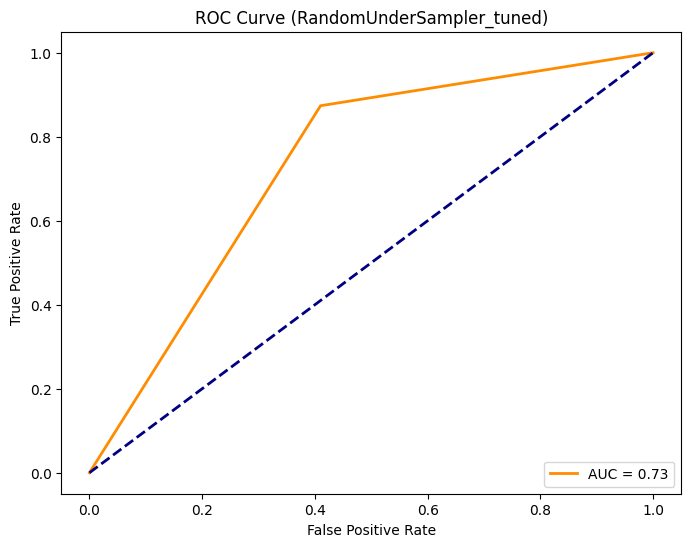

Epoch 1/30
46/46 [==============================] - 1s 4ms/step - loss: 0.6695 - accuracy: 0.6084
Epoch 2/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.7162
Epoch 3/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.7341
Epoch 4/30
46/46 [==============================] - 0s 5ms/step - loss: 0.5603 - accuracy: 0.7431
Epoch 5/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5478 - accuracy: 0.7500
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.7528
Epoch 7/30
46/46 [==============================] - 0s 5ms/step - loss: 0.5257 - accuracy: 0.7597
Epoch 8/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7590
Epoch 9/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.7631
Epoch 10/30
46/46 [==============================] - 0s 6ms/step - loss: 0.5076 - accuracy: 0.7638
Epoch 11/30
46/46 [

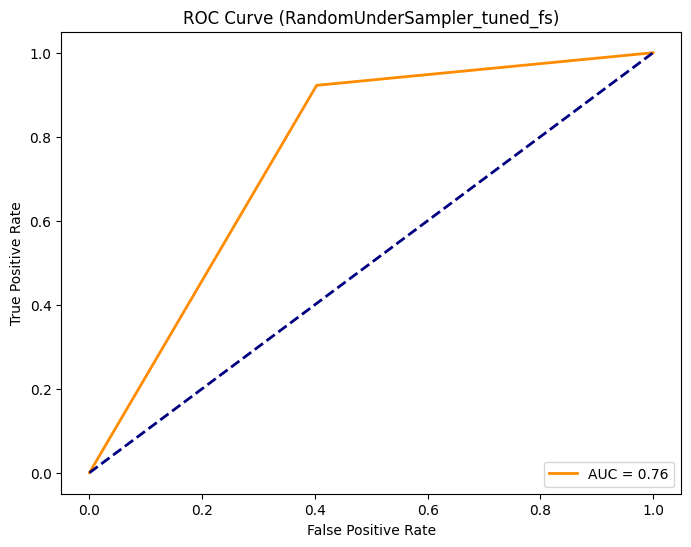

In [27]:

#undersampling
results={}

X_under, y_under = undersample(X_train, y_train)

metrics = train_ann_tuned(X_under, y_under, X_test, y_test,'RandomUnderSampler_tuned')
results[metrics[0]] = metrics[1:]

X_under_fs, y_under_fs = undersample(X_train_rf, y_train)

metrics = train_ann_tuned_fs(X_under_fs, y_under_fs, X_test_rf, y_test,'RandomUnderSampler_tuned_fs')
results[metrics[0]] = metrics[1:]


In [28]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler_tuned_fs,0.922,0.141,0.244,0.619
RandomUnderSampler_tuned,0.874,0.132,0.230,0.609
